# Model Development

## Model Layout

First I am laying out the design of the model

### Generator

- Input layer: 100 dim vector 
- Dense Layer: 128 (ReLU)
- Dense Layer: 128*32 (ReLU)
- reshape 16 x 16 x 32
- Conv2DTranspose: filters 32, kernel size 5x5, activation ReLU, stride=5, padding same
- Conv2DTranspose: filters 8, kernel size 3x3, activation ReLU, stride=3, 
- Conv2D to fit image into the data size

Currently, created the generator model, but the output dimension is not correct, I will need to make if fit the input_image dimension of the discriminator or crop it after to fit into the discriminator.

The model architecture was motivated by starting at a low 100 Dimensional latent space that will store features. Then they will be expanded on by the 2 Dense layers that follow which is transformed/reshaped to have a transpose convolution applied to it in order to expand it as an image. The convolutions are meant to expand on the stored featurs of the latent space and tranlate them to the actual image representation (generate)

This is the idea, but further testing needs to be done

- I was able to get dummy data to go throught the generator and it shows there is a problem with the models ability to generate, most likely due to the size of the kernels picked. There are alarming regions of static values. 

I testing out various values for the stride of the generators convolutinal layers, and 5 for the first stride and 3 for the second stride seemed to output the best randomized output with no uniform regions. This will be ideal for baking the features into a model to avoid weird artifacts.

### Stride 1

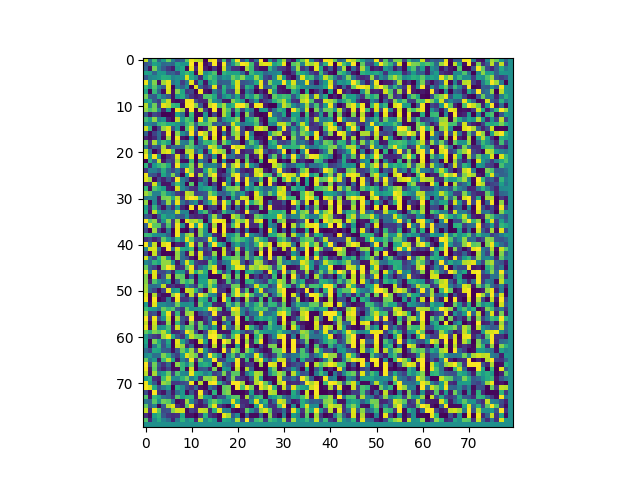

### Stride 2

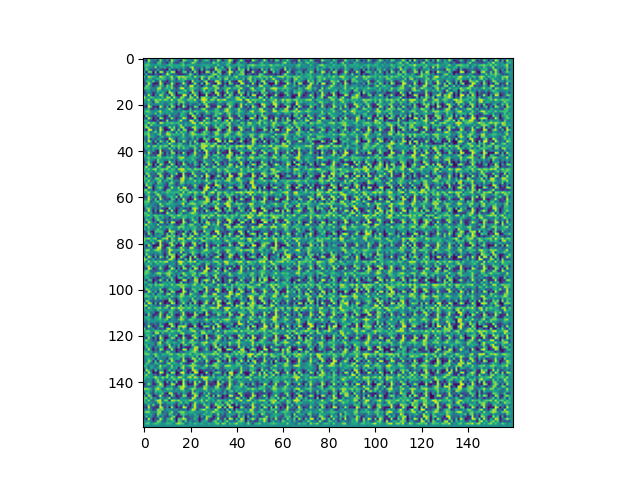

### Stride 3

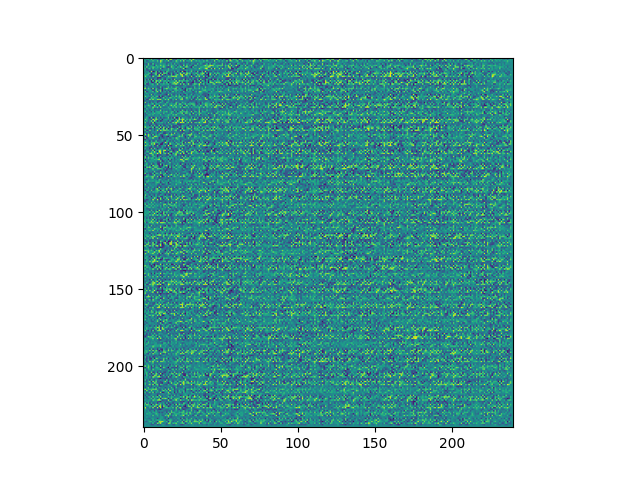

### Stride 4

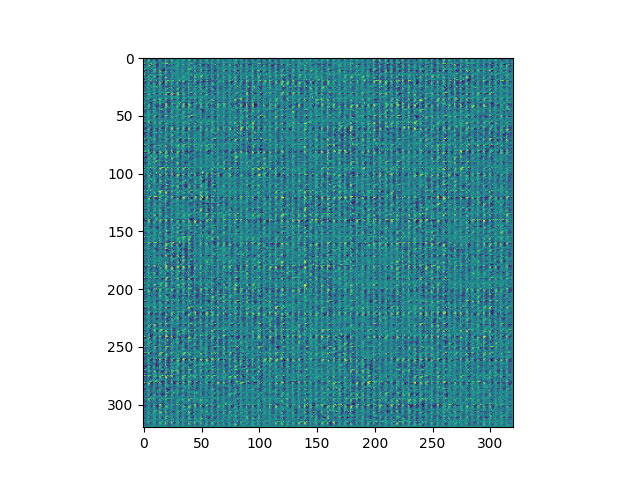

### Stride 5, 3

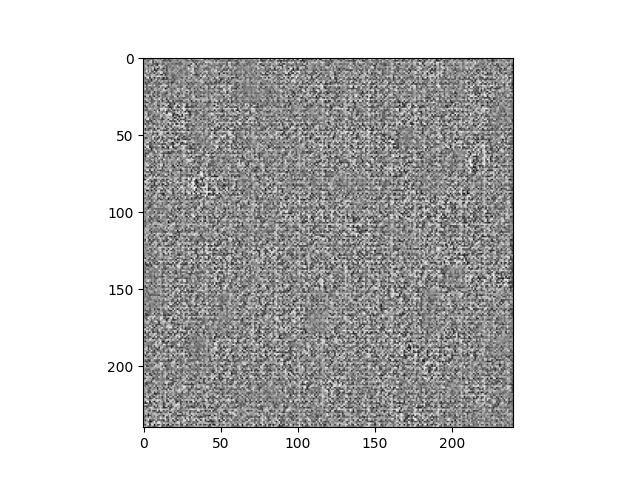

Last Layer Output Size

After some research on computing the ouput size of a convolution operation, I was able to calculate the kernel size needed for the output to match the sample image sizes so that they can be trained on the dicrimnator. 

> Potentially paramaterize the hard-coded values in the future for other members to have their own crops work on the model

### Discriminator

- 196 x 160 inputted into first conv Layer with 16 filters & 9x9 kernel, same padding, and stride of 5
- Next conv layer 32 filters 5x5 with same padding & stride of 4
- Next conv layer 128 filters 3x3 with same padding & stride of 3
- Flatten
- Dense to 1 with sigmoid

This architecture was chosen to hopefully extract different percision of featurs at each convolutional layer so that various degrees of patterns can be recognized by the discriminator

### Combined

The combined model was fairly simple to make after the generator and discriminator models had been made

### Training Ideas

Due to time constraints, I did not attempt to try various was to embed the sequential nature of the data into the latent space. 

Some ideas I had
- Select a vector to pick a random span point along, then  randomly pick an orthogonal vector to the span line. The latent noise vectors wont be completely random and will be a vector step size along the orthogonal vector. For this to work, the discriminator would need to take in the latent space as input or some other way to notify the discriminator how far away it is from the original span line. This way the farther you are from the span line the varying slice will be generated. Since I needed to figure out how to couple the discriminator, I could not implement it. 
- Train by the slice number of the file and make the latent space vector 155 dimensions with the slice dimension fixed at 1 and the others some random noise. I could not implement this because in order for it to run effeicently, I would need to organize the s3 buckets which I did not have the time to do. Furthermore, this would need some coupling with the discriminator which I did not have time to experiment with since training takes so long. 


### Issues
I am going to move on to grabbing the data for now cause I do not fully understand how the conv2D works right now.

In [ ]:
!pip list

Model: "sequential_183"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_274 (Conv2D)             │ (None, 76, 93, 16)     │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_275 (Conv2D)             │ (None, 19, 24, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_276 (Conv2D)             │ (None, 7, 8, 128)      │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_91 (Flatten)            │ (None, 7168)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_271 (Dense)               │ (None, 1)              │         7,169 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,305 (227.75 KB)

 Trainable params: 58,305 (227.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_272 (Dense)               │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_273 (Dense)               │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_90 (Reshape)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_180            │ (None, 80, 80, 32)     │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_181            │ (None, 480, 480, 8)    │         2,312 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Conv2D)                 │ (None, 379, 465, 1)    │        13,057 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,110,697 (4.24 MB)

 Trainable params: 1,110,697 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

(379, 465, 4)


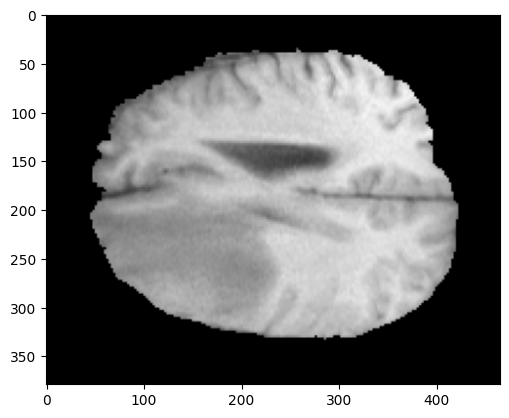

c:\Users\zaaim\anaconda3\envs\myenv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3374']. Received: the structure of inputs=*
  warnings.warn(


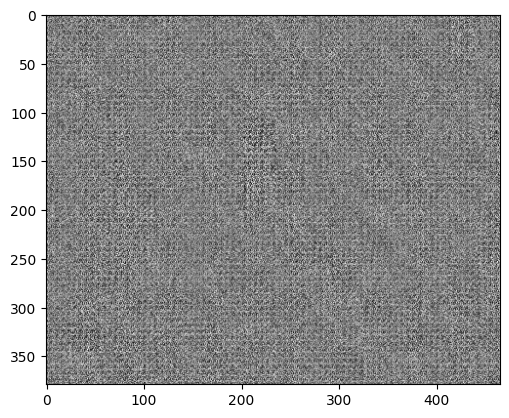

In [95]:
import numpy as np
import os
import boto3
from matplotlib import pyplot as plt
from PIL import Image
import io

# Sepcifying backend for Keras
os.environ["KERAS_BACKEND"]="tensorflow"

import keras
from keras import layers
from keras import ops


'''
Initializes the discriminator model 
'''
def init_discriminator(batch_size=155*4, image_shape=(379, 465, 1)):
    model = keras.Sequential() # Sequential model
    model.add(keras.Input(shape=image_shape))
    model.add(layers.Conv2D(filters=16, kernel_size=9, strides=5, padding="same", activation="relu")) # First Convolution
    model.add(layers.Conv2D(filters=32, kernel_size=5, strides=4, padding="same", activation="relu")) # Second Convolution
    model.add(layers.Conv2D(filters=128, kernel_size=3, strides=3, padding="same", activation="relu")) # Third Convolution
    model.add(layers.Flatten()) # Flatten output of last confolution
    model.add(layers.Dense(1, activation="sigmoid")) # Connect to single neuron to determine probability
    
    return model

def init_generator(image_size=(379, 465), latentD=100):
    model = keras.Sequential() # Sequential model
    model.add(keras.Input(shape=(latentD,)))
    model.add(layers.Dense(128, activation='relu')) # First layer of "feature generation" (Expanding latent space)
    model.add(layers.Dense(256*32, activation='relu')) # Expand latent space to first transpose convolution space wih feature generation
    model.add(layers.Reshape(target_shape=(16, 16, 32))) # Reshape to match transpose convolution dimension
    model.add(layers.Conv2DTranspose(filters=32, kernel_size=5, strides=5, padding="same", activation='relu')) # Expand
    model.add(layers.Conv2DTranspose(filters=8, kernel_size=3, strides=6, padding="same", activation="relu")) # Expand
    prevout=model.layers[-1].output.shape
    model.add(layers.Conv2D(filters=1, kernel_size=(prevout[1]-image_size[0]+1, prevout[2]-image_size[1]+1), strides=1, padding="valid", activation="sigmoid", name="output")) # Reduce convolution to image size
    return model

def init_gan(generator, discriminator, latentD):
    discriminator.compile(optimizer="adam", loss="binary_crossentropy", metric=['accuracy'])
    generator.compile(optimizer="adam", loss="binary_crossentropy")
    z = layers.Input(shape=(latentD,))
    img = generator(z)
    discriminator.trainable = False
    validity = discriminator(img)

    gan = keras.Model(z, validity)
    gan.compile(optimizer="adam", loss="binary_crossentropy")
    return gan


def train(epochs=50_000, save_interval=2000, crux=np.ones(shape=(100,)), step=1):

    batch_size = 310
    bucket_name = "chemocraft-data"
    prefix = "Zaaim/training/"
    s3 = boto3.resource('s3')
    bucket = s3.Bucket(bucket_name)
    training_set = list(bucket.objects.filter(Prefix=prefix))
    training_set = [obj for obj in training_set if "seg" not in obj.key]

    # Training the Discriminator

    for epoch in range(epochs):

        indicies = np.random.randint(0, len(training_set), batch_size // 2) 
        imgs = []
        for idx in indicies:
            response = bucket.Object(training_set[idx])
            image=Image.open(io.BytesIO(response.get()['Body'].read()))


    return

def test_generator(test_vector=None):
    feature_extractor = keras.Model(
        inputs=generator.inputs,
        outputs=generator.get_layer(name="output").output,
    )

    if test_vector==None:
        test_vector= 255*np.random.randn(1, 100, 1)

    feature = feature_extractor(test_vector)

    fig, ax = plt.subplots()
    ax.imshow(feature[0], cmap="grey")
    plt.show()

# Load Dataset in batch loop
"""Batch size: ????????? set after design made (simple array-like objects)"""

discriminator = init_discriminator()
generator = init_generator()

# View the initialized models

discriminator.summary()
generator.summary()

# Grab the .png sizes from first image

"""
1. training
2. Grab a single batch (1 Brain|1 Scan Type)
3. Generate half 
"""

batch_size = 310
bucket_name = "chemocraft-data"
prefix = "Zaaim/training/"
s3 = boto3.resource('s3')
bucket = s3.Bucket(bucket_name)
response = bucket.Object("Zaaim/training/BraTS20_Training_252/brain_slices/BraTS20_Training_252_t1/100.png")
image=Image.open(io.BytesIO(response.get()['Body'].read()))
print(np.array(image).shape)

fig, ax = plt.subplots()
ax.imshow(np.array(image))
plt.show()

test_generator()

